# Лабораторные работы 1-3

Лабораторная работа №1: иерархическая кластеризация

Лабораторная работа №2: метод к-средних

Лабораторная работа №3: DBSCAN

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os


Стандартизация данных
--------

In [3]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", index_col='City', decimal=',')

In [4]:
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [5]:
#сделаем обзор данных
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


Настораживает min для Work и Salary. Данные явно испорчены, эти строки удалим из выборки.

In [6]:
df = df.drop(df[(df.Work < 0) & (df.Salary < 0)].index)
df.describe()

,Work,Price,Salary
count,46.000000,46.000000,46.000000
mean,1879.913043,70.100000,39.545652
std,174.342552,21.389177,24.757703
min,1583.000000,30.300000,2.700000
25%,1745.250000,51.775000,14.375000
50%,1849.000000,70.950000,43.650000
75%,1976.250000,81.900000,59.700000
max,2375.000000,115.500000,100.000000


Work значительно больше Price и Salary, поэтому надо привести данные к одному порядку

In [8]:
from sklearn import preprocessing

# Выбираем MinMaxScaler приводя к отрезку [0, 1]
norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df)
# преобразовываем данные с параметрами
X = norm.transform(df)
# Полученный на предыдущем шаге объект X -- это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [9]:
X.head()

,Work,Price,Salary
City,,,
Amsterdam,0.165404,0.414319,0.475848
Athens,0.263889,0.275822,0.284687
Bogota,0.718434,0.089202,0.090442
Bombay,0.592172,0.000000,0.026721
Brussels,0.157828,0.510563,0.491264


In [10]:
#делаем копии данных для каждого раздела
df1=df
df2=df
df3=df
X1=X
X2=X
X3=X

1.Иерархическая кластеризация
--------
Применим алгоритм иерархической кластеризации и построим дендрограмму и каменистую осыпь. 
Вычисления производятся функцией linkage. 
Аргументы функции: 
    таблица данных, 
    метод вычисления расстояний между кластерами (```ward```, ```single```, ```complete```, ```average```) и 
    метод вычисления расстояний между объектами (```euclidean``` (default), ```cityblock``` aka Manhattan, ```hamming```, ```cosine```). См. [документацию]( https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link1 = linkage(X1, 'ward', 'euclidean')

Объект ```link``` представляет собой матрицу ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- размер нового кластера.

In [13]:
link1

array([[2.00000000e+01, 3.30000000e+01, 3.19198381e-02, 2.00000000e+00],
       [2.60000000e+01, 4.40000000e+01, 5.20074286e-02, 2.00000000e+00],
       [2.50000000e+01, 2.80000000e+01, 5.90550404e-02, 2.00000000e+00],
       [4.00000000e+00, 3.90000000e+01, 6.37259619e-02, 2.00000000e+00],
       [6.00000000e+00, 3.70000000e+01, 6.67101287e-02, 2.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 7.03508057e-02, 2.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 7.18059569e-02, 2.00000000e+00],
       [7.00000000e+00, 4.30000000e+01, 7.34715697e-02, 2.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 8.36500176e-02, 2.00000000e+00],
       [1.80000000e+01, 3.40000000e+01, 9.36777469e-02, 2.00000000e+00],
       [0.00000000e+00, 4.90000000e+01, 1.02114155e-01, 3.00000000e+00],
       [1.20000000e+01, 4.50000000e+01, 1.11730621e-01, 2.00000000e+00],
       [9.00000000e+00, 4.60000000e+01, 1.11882430e-01, 3.00000000e+00],
       [1.30000000e+01, 3.10000000e+01, 1.12403225e

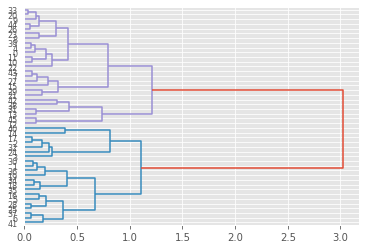

In [14]:
# Функция для построения дендрограммы
dn = dendrogram(link1, orientation = "right")

На первый взгляд 4 кластера, но ничего толком не видно, ничего не понятно, еще и игнорируем раскраску кластеров - надо строить каменистую осыпь.

**Каменистая осыпь**

Построим график, носящий название "каменистая осыпь". Напомним, в матрице ```link``` во второй колонке хранятся расстояния между парами слитых кластеров. По построению, строки матрицы упорядочены по этой колонке.

In [15]:
dist = link1[:, 2]
dist

array([0.03191984, 0.05200743, 0.05905504, 0.06372596, 0.06671013,
       0.07035081, 0.07180596, 0.07347157, 0.08365002, 0.09367775,
       0.10211416, 0.11173062, 0.11188243, 0.11240322, 0.1189986 ,
       0.1237909 , 0.13598099, 0.13607526, 0.1376503 , 0.14602388,
       0.16442474, 0.16953828, 0.17620073, 0.19413503, 0.20071939,
       0.20917829, 0.21887663, 0.23678859, 0.2588671 , 0.2652089 ,
       0.30212943, 0.31379065, 0.32035919, 0.36812421, 0.38336592,
       0.40235043, 0.41523011, 0.42373979, 0.66613806, 0.7327974 ,
       0.79577362, 0.8141613 , 1.10243379, 1.20919138, 3.02744985])

Таким образом, можно построить график зависимости расстояний между кластерами от шага слияния (обратного), и посмотреть, начиная с какого момента это расстояние перестанет значительно меняться.

Text(5, 1, '4 clusters')

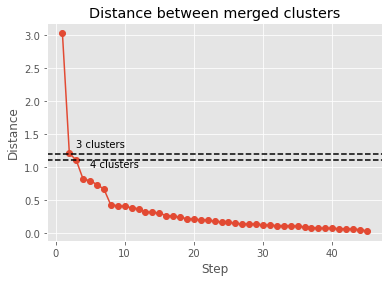

In [16]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(1.2, c='k', linestyle='dashed')
plt.text(3, 1.3, '3 clusters')
plt.axhline(1.1, c='k', linestyle='dashed')
plt.text(5, 1, '4 clusters')

Из картинки видно, что если мы остановимся объединять кластеры при расстоянии равном примерно 1.2, мы получим 3 кластера - как раскрашена дендрограмме, если на расстоянии примерно 1.1 - 4, которые мы и видели на дендрограмме.

In [26]:
# Останавливаем объединение, если расстояние между кластерами превышает 1.2
df1['cluster'] = fcluster(link1, 1.2, criterion='distance')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением группирующей функции.

In [27]:
df1.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1987.857143,52.395238,16.347619
2,1780.500000,108.550000,71.300000
3,1792.000000,77.526316,55.157895


In [28]:
df1.groupby('cluster').size()

cluster
1    21
2     6
3    19
dtype: int64

In [29]:
# Останавливаем объединение, если расстояние между кластерами превышает 1.1
df1['cluster'] = fcluster(link1, 1.1, criterion='distance')

In [30]:
df1.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1893.428571,53.664286,16.892857
2,2176.714286,49.857143,15.257143
3,1780.500000,108.550000,71.300000
4,1792.000000,77.526316,55.157895


In [31]:
df1.groupby('cluster').size()

cluster
1    14
2     7
3     6
4    19
dtype: int64

**Вывод:**
4 кластера кажутся более логичными и по содержанию, и по кол-ву вхождений в этот кластер, примерное описание: 1) При среднем рабочем дне низкая з/п, цены ниже среднего 2)При длинном рабочем дне очень низкая з/п, цены ниже среднего 3) При средней продолжительности рабочем дне высокая з/п, но и высокие цены 4)При средней продолжительности рабочем дне средняя з/п, цены выше среднего

2.Метод к-средних
----------------------

In [32]:
#проверим на всякий случай данные
X2.head()

,Work,Price,Salary
City,,,
Amsterdam,0.165404,0.414319,0.475848
Athens,0.263889,0.275822,0.284687
Bogota,0.718434,0.089202,0.090442
Bombay,0.592172,0.000000,0.026721
Brussels,0.157828,0.510563,0.491264


Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 4 как результат иерархической кластеризации. 

In [34]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=4, random_state=42)

In [35]:
# подгонка модели по данным из X
model.fit(X2)

KMeans(n_clusters=4, random_state=42)

In [36]:
# Результат кластеризации на данных X
model.labels_

array([2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 2, 2, 0, 0, 3, 2, 1, 3, 1, 1, 2, 2,
       2, 2, 3, 1, 2, 2, 1, 2, 1, 0, 3, 2, 1, 1, 1, 3, 0, 2, 3, 3, 0, 2,
       2, 0], dtype=int32)

In [37]:
# координаты центров кластеров
model.cluster_centers_

array([[0.24936869, 0.91842723, 0.70503597],
       [0.34400826, 0.24039693, 0.14276371],
       [0.26388889, 0.55429948, 0.53913561],
       [0.69507576, 0.28016432, 0.13751285]])

Модель выше разбивала на четыре кластера.
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

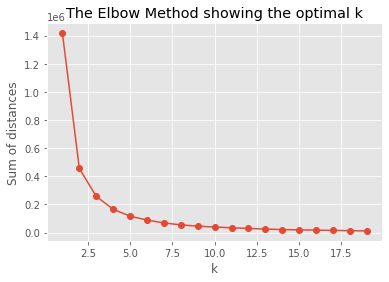

In [38]:
K = range(1, 20)
models = [KMeans(n_clusters=k, random_state=42).fit(df2) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Локоть так же как и в прошлый раз находится на 3-4.

Для сравнения с предыдущим методом возьмем, что четыре кластера - это оптимальный выбор. Посмотрим на список наблюдений, составляющий данные кластеры, и чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения факторов для каждого кластера.

In [39]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df2)
df2['cluster'] = model.labels_
df2.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1826.428571,75.021429,49.492857
1,1996.769231,60.238462,27.715385
2,1702.928571,80.121429,48.442857
3,2221.400000,53.900000,17.540000


In [40]:
df2.groupby('cluster').size()

cluster
0    14
1    13
2    14
3     5
dtype: int64

**Вывод:** логика распределения по кластерам осталась прежней, однако кол-во наблюдений для каждого класса изменилось.

3.DBSCAN
------------------

In [41]:
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [42]:
#опять проверим на всякий случай данные
X3.head()

,Work,Price,Salary
City,,,
Amsterdam,0.165404,0.414319,0.475848
Athens,0.263889,0.275822,0.284687
Bogota,0.718434,0.089202,0.090442
Bombay,0.592172,0.000000,0.026721
Brussels,0.157828,0.510563,0.491264


In [43]:
#  Создадим объект DBSCAN, зададим значения параметров. 
#  Значения 3-х первых параметров совпадают со значениями "по умолчанию"
dbscan_1 = DBSCAN(eps=2, metric='euclidean', min_samples=4)

#  Обучим модель  DBSCAN clustering algorithm
dbscan_1.fit(X3)
#  к какому кластеру относится объект?
# В какой кластер попало наблюдение - Numpy массив номеров кластеров
dbscan_1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Очевидно все в одном кластере, можно даже таблицу частот не строить. Будем подбирать.

In [44]:
#dbscan_1 = DBSCAN(eps=0.1, metric='euclidean', min_samples=2) -- 22 точки в -1 и 8 кластеров
#dbscan_1 = DBSCAN(eps=0.1, metric='euclidean', min_samples=3) -- 30 точек в -1 и 4 кластера
#dbscan_1 = DBSCAN(eps=0.15, metric='euclidean', min_samples=3) -- 12 точек в -1 и 2 кластера
#dbscan_1 = DBSCAN(eps=0.2, metric='euclidean', min_samples=3) -- 8 точек в -1 и 2 кластера
dbscan_1 = DBSCAN(eps=0.2, metric='euclidean', min_samples=2)
dbscan_1.fit(X3)
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  4]
 [ 0 19]
 [ 1 19]
 [ 2  2]
 [ 3  2]]


**Вывод:** логика распределения по кластерам осталась прежней, однако кол-во наблюдений для каждого класса изменилось.